<a href="https://colab.research.google.com/github/delibae/health_care_pr/blob/sungjun/project_2/%EC%95%88%EC%84%B1%EC%A4%80/Pill.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import json
import csv
import os
import pandas as pd
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from PIL import Image
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten
from tensorflow.python.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
input_folder_path = "/content/drive/MyDrive/data/TL_81"
output_file_path = "/content/drive/MyDrive/data/data.csv"
img_dir =r'/content/drive/MyDrive/data/TS_81'

folder_list = os.listdir(input_folder_path)

file_list = []
df_list = []

for folder in folder_list:
  input_folder_file = input_folder_path+"/"+folder
  file_list = os.listdir(input_folder_file)
  print(folder)
  for file_name in file_list:
    with open(input_folder_file+"/"+file_name, 'r') as file:
      data = json.load(file)
      df_list.append((data["images"]))


K-038912_json
K-038954_json
K-038927_json
K-038884_json
K-038914_json
K-038910_json
K-038890_json
K-038913_json
K-038929_json
K-038896_json


In [ ]:
csv_list = ['file_name', 'dl_name']

with open(output_file_path, "w", encoding="UTF-8",newline='') as output_file:
  csvwriter = csv.writer(output_file)
  csvwriter.writerow(csv_list)
  for dataList in df_list:
    data_list = [dataList[0].get('file_name'),dataList[0].get('dl_name')]
    csvwriter.writerow(data_list)


In [ ]:
df = pd.read_csv(output_file_path)

X = []
Y = []

for imgPath, imgName in zip(df.get('file_name'), df.get('dl_name')):
  img = cv2.imread(img_dir+"/"+imgPath[:8]+"/"+imgPath)
  img = cv2.resize(img, (224, 224))
  img = tf.image.convert_image_dtype(img,tf.float32)
  X.append(img)
  Y.append(imgName)

X = np.array(X)
Y = np.array(Y)


In [ ]:
encoder = OneHotEncoder()
Y=Y.reshape(-1,1)
encoder.fit(Y)
label = encoder.transform(Y).toarray()

label

X_train, X_test, Y_train, Y_test = train_test_split(X, label, test_size=0.2,random_state=1)

xy = (X_train, X_test, Y_train, Y_test,)

np.save("/content/drive/MyDrive/data/img_data.npy", xy)

/usr/local/lib/python3.8/dist-packages/numpy/lib/npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


In [3]:
X_train, X_test, Y_train, Y_test = np.load("/content/drive/MyDrive/data/img_data.npy", allow_pickle=True)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=1)

model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=10, activation="softmax"))

model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
history1 = model.fit(X_train, Y_train, epochs=30, validation_data=(X_val,Y_val))


Epoch 1/30
54/54 [==============================] - 43s 487ms/step - loss: 5.7236 - accuracy: 0.1128 - val_loss: 0.3252 - val_accuracy: 0.1019
Epoch 2/30
54/54 [==============================] - 25s 457ms/step - loss: 0.3283 - accuracy: 0.1186 - val_loss: 0.3277 - val_accuracy: 0.1065
Epoch 3/30
54/54 [==============================] - 25s 464ms/step - loss: 0.3251 - accuracy: 0.1296 - val_loss: 0.3288 - val_accuracy: 0.1019
Epoch 4/30
54/54 [==============================] - 25s 465ms/step - loss: 0.3254 - accuracy: 0.1128 - val_loss: 0.3266 - val_accuracy: 0.1019
Epoch 5/30
54/54 [==============================] - 25s 462ms/step - loss: 0.3246 - accuracy: 0.1111 - val_loss: 0.3255 - val_accuracy: 0.1019
Epoch 6/30
54/54 [==============================] - 25s 464ms/step - loss: 0.3248 - accuracy: 0.1204 - val_loss: 0.3308 - val_accuracy: 0.1181
Epoch 7/30
54/54 [==============================] - 25s 463ms/step - loss: 0.3235 - accuracy: 0.1204 - val_loss: 0.3159 - val_accuracy: 0.1181

17/17 [==============================] - 5s 294ms/step - loss: 0.1226 - accuracy: 0.7296


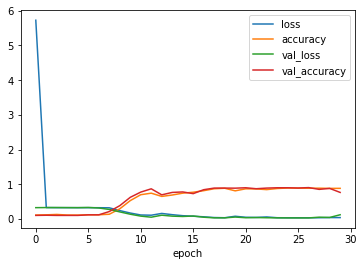

In [4]:
locc,acc = model.evaluate(X_test, Y_test)

plt.plot(history1.history['loss'], label='loss')
plt.plot(history1.history['accuracy'], label='accuracy')
plt.plot(history1.history['val_loss'], label='val_loss')
plt.plot(history1.history['val_accuracy'], label='val_accuracy')

plt.xlabel('epoch')
plt.legend()
plt.show()